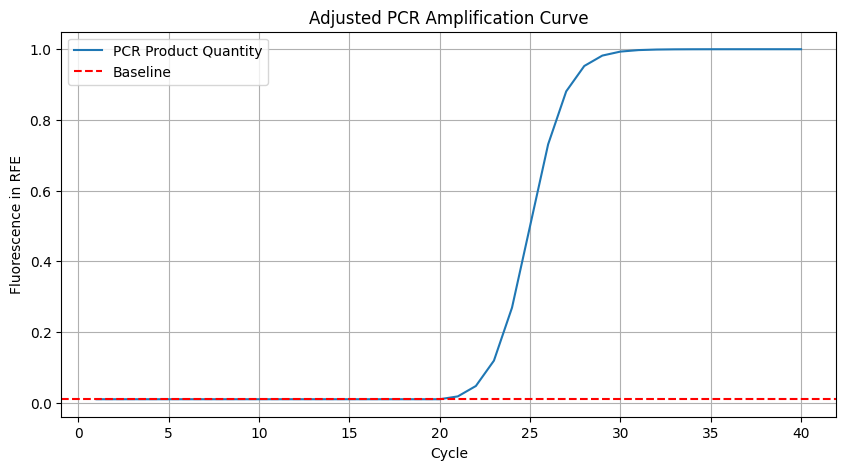

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from goertzel_test import *

# Define the PCR curve parameters
cycles = np.arange(1, 41)  # 40 cycles total
initial_phase_cycles = 20
inflection_cycle = 25
exponential_phase_end = 36
final_phase_cycles = 36

# Adjust the PCR curve to more accurately reflect a sigmoid shape
def sigmoid_pcr_curve(cycle, initial_phase_cycles, inflection_cycle, exponential_phase_end, final_phase_cycles, baseline):
    L = 1  # Assuming the maximum fluorescence value is normalized to 1
    k = 1  # This is a guess for the logistic growth rate; you may need to adjust this
    
    if cycle <= initial_phase_cycles:
        return baseline  # Baseline value (considered as noise level)
    elif initial_phase_cycles < cycle <= exponential_phase_end:
        # Logistic growth function for the exponential phase
        return L / (1 + np.exp(-k * (cycle - inflection_cycle)))
    elif cycle <= final_phase_cycles:
        # Transition to the plateau phase
        return L / (1 + np.exp(-k * (exponential_phase_end - inflection_cycle))) * \
               (1 - np.exp(-0.05 * (cycle - exponential_phase_end)))
    else:
        # Final phase where the curve has plateaued
        return L

# Generate the PCR curve
baseline = 0.01  # Baseline fluorescence level
pcr_signal = np.array([sigmoid_pcr_curve(c, initial_phase_cycles, inflection_cycle, exponential_phase_end, final_phase_cycles, baseline) for c in cycles])

# Plot the PCR curve
plt.figure(figsize=(10,5))
plt.plot(cycles, pcr_signal, label='PCR Product Quantity')
# plt.axvline(x=inflection_cycle, color='r', linestyle='--', label='Threshold cycle')  # change to be a calculated cq value eventually
plt.axhline(y=baseline, color='r', linestyle='--', label='Baseline')
plt.xlabel('Cycle')
plt.ylabel('Fluorescence in RFE')
plt.title('Adjusted PCR Amplification Curve')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# import numpy as np
# import matplotlib.pyplot as plt
# from goertzel_test import calculate_psd_rfu

# # Define the PCR curve parameters
# cycles = np.arange(1, 41)  # 40 cycles total
# initial_phase_cycles = 20
# inflection_cycle = 25
# exponential_phase_end = 36
# final_phase_cycles = 36

# # Adjust the PCR curve to more accurately reflect a sigmoid shape
# def sigmoid_pcr_curve(cycle, initial_phase_cycles, inflection_cycle, exponential_phase_end, final_phase_cycles, baseline, rfu):
#     L = rfu  # Assuming the maximum fluorescence value is normalized to RFU
#     k = 1  # This is a guess for the logistic growth rate; you may need to adjust this
    
#     if cycle <= initial_phase_cycles:
#         return baseline  # Baseline value (considered as noise level)
#     elif initial_phase_cycles < cycle <= exponential_phase_end:
#         # Logistic growth function for the exponential phase
#         return L / (1 + np.exp(-k * (cycle - inflection_cycle)))
#     elif cycle <= final_phase_cycles:
#         # Transition to the plateau phase
#         return L / (1 + np.exp(-k * (exponential_phase_end - inflection_cycle))) * \
#                (1 - np.exp(-0.05 * (cycle - exponential_phase_end)))
#     else:
#         # Final phase where the curve has plateaued
#         return L

# # Generate a test signal to represent PCR data
# sample_rate = 1000  # Example sample rate
# signal_length = 1000  # Number of samples in the signal
# test_signal = np.random.normal(0, 1, signal_length)  # Generate a random test signal

# # Calculate RFU using the Goertzel algorithm
# center_freq = 500  # Example center frequency
# bandwidth = 100  # Example bandwidth
# _, _, rfu_scalar = calculate_psd_rfu(test_signal, sample_rate, center_freq, bandwidth)

# # Ensure rfu_scalar is a single scalar value
# if not np.isscalar(rfu_scalar):
#     raise ValueError("RFU value must be a scalar")

# # Generate the PCR curve with RFU
# baseline = 0.01  # Baseline fluorescence level
# pcr_signal = np.array([sigmoid_pcr_curve(c, initial_phase_cycles, inflection_cycle, exponential_phase_end, final_phase_cycles, baseline, rfu_scalar) for c in cycles])

# # Plot the PCR curve
# plt.figure(figsize=(10,5))
# plt.plot(cycles, pcr_signal, label='PCR Product Quantity')
# plt.axhline(y=baseline, color='r', linestyle='--', label='Baseline')
# plt.xlabel('Cycle')
# plt.ylabel('Fluorescence in RFU')
# plt.title('Adjusted PCR Amplification Curve')
# plt.legend()
# plt.grid(True)
# plt.show()


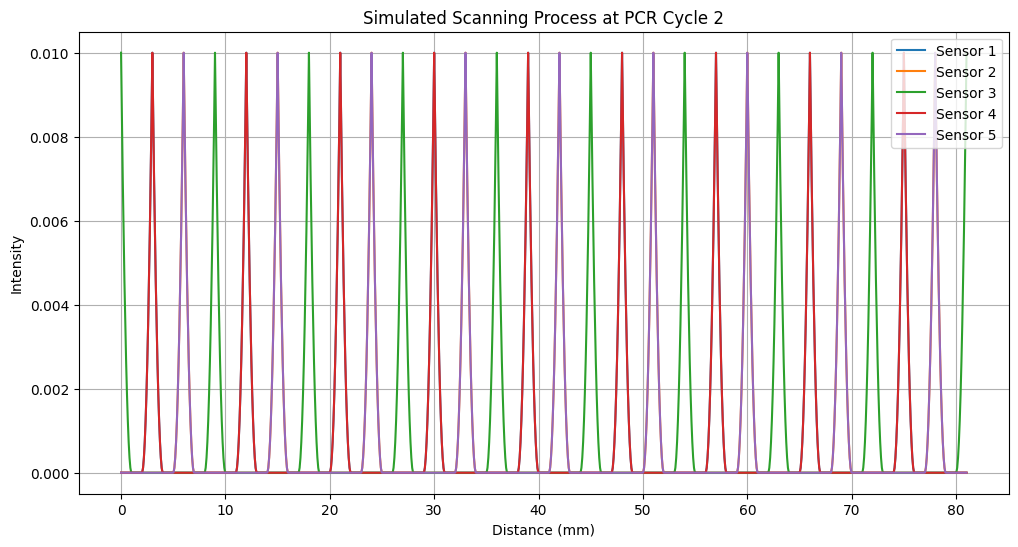

In [28]:
# Scanning detection simulation parameters
carriage_pitch = 6  # Pitch of the moving sensors
aperture_pitch = 9  # Pitch of the stationary apertures
num_detectors = 5   # Number of sensors
detector_diameter = 2  # Diameter of the sensor aperture
aperture_diameter = 2  # Diameter of the stationary aperture
start_alignment_offset = 1.5  # Offset until the first sensor aligns with the first aperture
total_scan_distance = 9 * aperture_pitch  # Total distance carriage travels

# Define the distances array
distances = np.linspace(0, total_scan_distance, 1000)

# Choose a specific PCR cycle and its intensity
chosen_cycle = 2  # Example: cycle 2
chosen_cycle_intensity = pcr_signal[chosen_cycle - 1]  # Adjusting for zero-indexing

# Function to simulate scanning with constant cycle intensity
def simulate_scanning_with_constant_cycle(distances, carriage_pitch, aperture_pitch, num_detectors, detector_diameter, chosen_cycle_intensity):
    sensor_signals = np.zeros((len(distances), num_detectors))
    for i, distance in enumerate(distances):
        for detector in range(num_detectors):
            detector_position = (distance + start_alignment_offset + detector * carriage_pitch) % aperture_pitch
            overlap = max(0, (detector_diameter / 2) - abs(detector_position - aperture_pitch / 2))
            intensity = (overlap / (detector_diameter / 2)) ** 2 if overlap > 0 else 0
            sensor_signals[i, detector] = intensity * chosen_cycle_intensity
    return sensor_signals

# Calculate sensor signals with constant cycle intensity
constant_cycle_sensor_signals = simulate_scanning_with_constant_cycle(distances, carriage_pitch, aperture_pitch, num_detectors, detector_diameter, chosen_cycle_intensity)

# Plot the scanning process for each sensor with constant cycle intensity
plt.figure(figsize=(12, 6))
for detector in range(num_detectors):
    plt.plot(distances, constant_cycle_sensor_signals[:, detector], label=f'Sensor {detector + 1}')
plt.xlabel('Distance (mm)')
plt.ylabel('Intensity')
plt.title(f'Simulated Scanning Process at PCR Cycle {chosen_cycle}')
plt.legend()
plt.grid(True)
plt.show()